# Linear Models
This file is for test and creation of linear/logistic regression models
1. Linear_regression built - testing to be done
2. Logistic_regression to be built as a class


In [1]:
import numpy as np
import warnings
import time

In [ ]:
"""
 feature scaling occurs across categories i.e. we're training a model
 to recognise dogs, we normalise across:
 tail length, leg length, nose-pointy-outness
                  normalisation (x-xmin)/(xmax-xmin)
                 standardisation (X-Xsample_mean)/Xsample_std
"""
def normalize(X):
    # normalize across features
    m,n = X.shape
    for col in range(n):
        X[:,col] = ((X[:,col]-np.min(X[:,col]))/(np.max(X[:,col])-np.min(X[:,col])))
    return X
def standardize(X):
    # standardize across features
    m,n = X.shape
    for col in range(n):
        X[:,col] = (X[:,col]-np.mean(X[:,col]))/np.std(X[:,col])
    return X
# Creation of linear regression class:
class Linear_regression:
    """Linear regression model
    Parameters
    -----------
    alpha : float, default 0.01
        learning rate of gradient descent
    degree_accuracy : float, default 0.05
        degree of accuracy that linear
        regression is looking for during 
        gradient descent
    feature_scaling : string, default None
        options: None,'normalize'
        """
    def __init__(self,alpha=0.01, degree_accuracy=0.05,feature_scaling=None):
        self.alpha = alpha
        self.degree_accuracy = degree_accuracy
        self.thetas_set = False
        self.feature_scaling_options = [None,'normalize']
        assert feature_scaling in self.feature_scaling_options,"no such feature scaling option"
        self.feature_scaling = feature_scaling
        self.theta = np.array([])
    def generate_theta(self,X):
        self.theta = np.random.rand(X.shape[1],1)
    def add_intercept(self,X):
        return np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
    def computeCost(self,X,y,theta):
        # Cost function
        m,n=X.shape
        J=0
        X=(np.dot(X,theta))
        J=sum(np.power(X-y,2))
        J*=(1.0/(2.0*m))
        return J
    def coefficients(self):
        # prints coefficients
        print(self.theta[:-1,:])
    def intercept(self):
        # print intercept
        print(self.theta[-1,:])
    def fit(self,X,y):
        """fits model
        Parameters
        --------------
        X : numpy array
            Array should be independent variables.
            Shape must be m * n, where m is cases
            and n is features
        y : numpy array
            Array should be dependent variable
            Shape should be m * 1, where m is cases
        Returns
        --------------
        theta : numpy array
            These are the coefficients of the linear
            regression. This will be stored in the 
            model for use in predict"""
        
        alpha=self.alpha
        degree_accuracy=self.degree_accuracy
        if self.thetas_set == False:
            if self.feature_scaling == 'normalize':
                X=normalize(X)
            X = self.add_intercept(X)
            self.generate_theta(X)
            self.thetas_set = True
        theta = self.theta
        h=0
        m,n=X.shape
        J_history=[]
        J=999.0
        iterations=0
        print(theta)
        while J>=degree_accuracy:
            h=np.dot(X,theta)
            #print('h1: {0}'.format(h))
            h=np.dot(X.T,h-y)/float(m)
            #print('h2: {0}'.format(h))
            theta=theta-(h*alpha)
            #print(theta)
            J=self.computeCost(X,y,theta)
            J_history.append(J)
            iterations+=1
            if iterations > 2 and J > J_history[-2]:
                print('J increasing, reducing alpha to: {0}'.format(alpha/2))
                self.generate_theta(X)
                self.alpha = alpha/2
                theta = self.fit(X,y)
                return theta
        #print(J_history)
        print('Returned Thetas are: {0}'.format(theta))
        print('degree of accuracy: %s' % J_history[-1])
        print('number of iterations: %s' % iterations)
        self.theta = theta
        return theta
    def predict(self,X):
        """Use this function to predict y
        from a set of X data
        Parameters
        ------------
        X : numpy array
            independent variables, shaped
            m * n, where m is case and n is 
            feature
        """
        if self.feature_scaling == 'normalize':
            X=normalize(X)
        X = self.add_intercept(X)
        return np.dot(X,self.theta)

In [ ]:
# Testing
import matplotlib.pyplot as plt
%matplotlib inline
# Step 1 generate FAKE data
# These are the test thetas being used to generate fake data
theta0=13
theta1=21
X=np.random.randint(1,high=80,size=(90,1))
X=X.reshape(len(X),1)
#one=np.ones(X.shape)
#X=np.concatenate((one,X),axis=1)
y=np.array([[theta0+X[i,0]*theta1] for i in range(len(X))])

# Step 2 - create and fit linear regression model
lr=Linear_regression(feature_scaling=None)
lr.fit(X,y)



# Logistic regression
Have created two attempts at classes to see if both work
- First uses scipy.optimize.fmin_cg
- Second uses gradient descent
- need to test timing on both (likely that First will win)

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data[:,:2]
y=iris.target
theta=np.random.rand(X.shape[1],1)
X=X[y<2,:]
y=y[y<2]
y=y.reshape(X.shape[0],1)

In [17]:
from scipy.optimize import fmin_cg #fmin_cg to train neural network

class Logistic_regression:
    def __init__(self,alpha=0.01):
        self.alpha=alpha
        self.theta=np.array([])
    def g(self,X,theta):
        m,n=X.shape
        test_e=np.zeros((m,1))
        test_e+=np.exp(1)
        theta=theta.reshape(n,1)
        sig = np.array(1/(1+np.power(test_e,-np.dot(X,theta))),dtype=float)
        return sig
    def cost_function(self,theta,X,y):
        m,n=X.shape
        y=y.reshape(m,1)
        one=np.ones((m,1))
        theta = theta.reshape(n,1)
        a=np.dot(y.T,np.log(self.g(X,theta)))
        try:
            a[np.isnan(a)]=0
        except:
            pass
        b=np.dot((one-y).T,np.log(one-self.g(X,theta)))
        try:
            b[np.isnan(b)]=0
        except:
            pass
        j=np.array((-1/float(m))*(a-b),dtype=float)
        return j.flatten()
    def gradient(self,theta,X,y):
        m,n = X.shape
        y=y.reshape(m,1)
        theta = theta.reshape(n,1)
        res = np.dot(X.T,self.g(X,theta)-y)
        return res.flatten()
    def fit(self,X,y):
        m,n = X.shape
        self.X=X
        self.y=y
        self.theta = np.random.randn(n,)
        while np.absolute(self.cost_function(self.theta,X,y)[0])>0.05:
            self.theta = np.random.randn(n,)
            theta = self.theta
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.theta = fmin_cg(self.cost_function,x0=theta,args=(X,y),fprime=self.gradient,disp=False)
        #print('fitting complete')
    def predict(self,X):
        m,n = X.shape
        theta = self.theta.reshape(n,1)
        sig = self.g(X,theta)
        sig[sig<0.5]=0
        sig[sig>0.5]=1
        return sig
    def accuracy(self):
        X=self.X
        y=self.y
        m,n = X.shape
        y=y.reshape(m,1)
        theta = self.theta.reshape(n,1)
        sig = self.g(X,theta)
        sig[sig<0.5]=0
        sig[sig>0.5]=1
        accu = len(y[y==sig])/float(m)
        #print('accuracy score: {0}'.format(accu))
        return accu

In [24]:
class Logistic_regression2:
    """Linear regression model
    Parameters
    -----------
    alpha : float, default 0.01
        learning rate of gradient descent
    degree_accuracy : float, default 0.05
        degree of accuracy that linear
        regression is looking for during 
        gradient descent
    feature_scaling : string, default None
        options: None,'normalize','standardize'
        """
    def __init__(self,alpha=0.01,degree_accuracy=0.05,feature_scaling=None):
        self.alpha = alpha
        self.degree_accuracy=degree_accuracy
        self.feature_scaling=feature_scaling
    def cost_function(self,X,y,theta):
        m,n=X.shape
        j=(1/m)*(-np.dot(y.T,np.log(self.g(X,theta)))-np.dot((self.one-y).T,np.log(1-self.g(X,theta))))
        return sum(j[0])
    def gradient_descent(self,alpha,theta,X,y):
        m,n=X.shape
        theta=theta-(self.alpha/m)*np.dot(X.T,self.g(X,theta)-y)
        return theta
    def g(self,X,theta):
        return 1/(1+np.power(self.test_e,-np.dot(X,theta)))
    def fit(self,X,y,max_iterations=500):
        """fits model
        Parameters
        --------------
        X : numpy array
            Array should be independent variables.
            Shape must be m * n, where m is cases
            and n is features
        y : numpy array
            Array should be dependent variable
            Shape should be m * 1, where m is cases
        max_iterations : integer, defaut 500
            Can amend the maximum iterations of 
            gradient descent before model finishes
        """
        if self.feature_scaling=='normalize':
            X=normalize(X)
        elif self.feature_scaling=='standardize':
            X=standardize(X)
        self.X=X
        self.y=y
        m,n=X.shape
        iteration=0
        self.theta = np.random.rand(n,1)
        self.test_e=np.zeros((m,1))
        self.test_e+=np.exp(1)
        self.one=np.ones((m,1))
        while not(np.absolute(self.cost_function(X,y,self.theta))<=self.degree_accuracy or iteration>=max_iterations):
            self.theta = self.gradient_descent(self.alpha,self.theta,X,y)
            iteration+=1
        if iteration>=max_iterations:
            pass
            #print('Iterations exceeded. Model may return incorrect values')
        else:
            pass
            #print('Model fit.')
        #self.accuracy()
    def coef(self):
        print(self.theta)
    def predict(self,X):
        """Predicts outcomes based on fitted model
        Parameters
        --------------
        X : numpy array
            inputs in shape m x n,
            where m is sample cases and
            n is features
        Returns 
        --------------
        prediction : numpy array
            This is the list of predicted
            outcomes based on fitted model
        """
        if self.feature_scaling=='normalize':
            X=normalize(X)
        elif self.feature_scaling=='standardize':
            X=standardize(X)
        prediction = self.g(X,self.theta)
        prediction[prediction<0.5]=0
        prediction[prediction>0.5]=1
        return prediction
    def accuracy(self):
        pred=self.predict(self.X)
        accu = y[y==pred].shape[0]/y.shape[0]
        #print('Accuracy: {0}'.format(accu))
        return accu



The comparison - will be comparing time of two methods over 100 regression fits. 

Whichever has lowest average time score and highest accuracy score will win

In [26]:
accuracy_log = []
time_log = []
for i in range(1000):
    temp_accuracy = []
    temp_time = []
    t1=time.time()
    lr=Logistic_regression()
    lr.fit(X,y)
    temp_accuracy.append(lr.accuracy())
    t2=time.time()
    temp_time.append(t2-t1)
    t1=time.time()
    log_r2=Logistic_regression2()
    log_r2.fit(X,y)
    temp_accuracy.append(log_r2.accuracy())
    t2=time.time()
    temp_time.append(t2-t1)
    accuracy_log.append(temp_accuracy)
    time_log.append(temp_time)
accuracy_log=np.array(accuracy_log)
time_log=np.array(time_log)
print('Model 1 mean accuracy: {0}'.format(np.mean(accuracy_log[:,0])))
print('Model 2 mean accuracy: {0}'.format(np.mean(accuracy_log[:,1])))
print('Model 1 mean time: {0}'.format(np.mean(time_log[:,0])))
print('Model 2 mean time: {0}'.format(np.mean(time_log[:,1])))

Model 1 mean accuracy: 0.9900000000000001
Model 2 mean accuracy: 0.9900000000000001
Model 1 mean time: 0.1031946759223938
Model 2 mean time: 0.10257884621620178


Model 2 very slightly better.
Moving on with implementation of model 2

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

standard deviation time model 1: 0.025827872112967824, model 2: 0.024551747687036114
standard deviation accuracy model 1: 7.66053886991358e-15, model 2: 7.66053886991358e-15


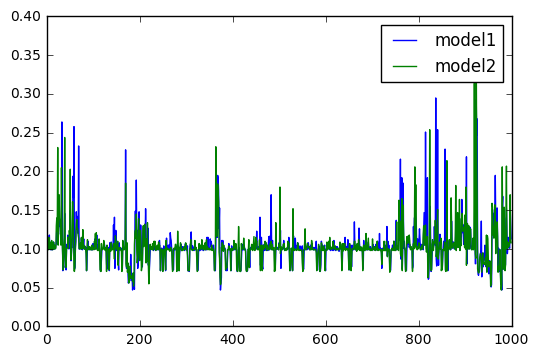

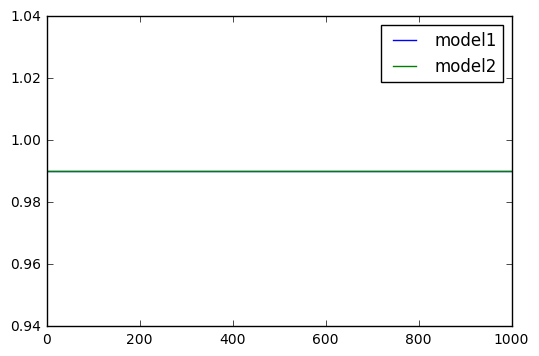

In [42]:
print('standard deviation time model 1: {0}, model 2: {1}'.format(np.std(time_log,axis=0)[0],np.std(time_log,axis=0)[1]))
print('standard deviation accuracy model 1: {0}, model 2: {1}'.format(np.std(accuracy_log,axis=0)[0],np.std(accuracy_log,axis=0)[1]))
plt.plot(time_log)
plt.legend(['model1','model2'])
plt.show()
plt.plot(accuracy_log)
plt.legend(['model1','model2'])
plt.show()

In [ ]:
from scipy.optimize import fmin_cg #fmin_cg to train neural network
class NeuralNetwork:
    def __init__(self,hidden_layer_size=20,epsilon=0.12,lamb=1,feature_scaling=None):
        self.hidden_layer_size=hidden_layer_size
        self.epsilon=epsilon
        self.lamb=lamb
        self.X=np.array([[]])
        self.y=np.array([[]])
        self.theta=np.array([[]])
        self.input_layer_size=5
        self.output_layer_size=1
        self.feature_scaling_options = [None,'normalize','standardize']
        assert feature_scaling in self.feature_scaling_options,"no such feature scaling option"
        self.feature_scaling=feature_scaling
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    def sigmoidGradient(self,z):
        return np.multiply(self.sigmoid(z),(1-self.sigmoid(z)))
    def initialise_thetas(self,input_layer_size,hidden_layer_size,output_layer_size):
        theta1=np.random.rand(input_layer_size+1,hidden_layer_size)
        theta2=np.random.rand(hidden_layer_size+1,output_layer_size)
        theta=np.array([theta1,theta2])
        theta=self.theta_flatten(theta)*2*self.epsilon-self.epsilon
        return theta
    def theta_flatten(self,theta):
        theta_t=theta[:]
        theta=np.array([])
        #fmin_cg requires a gradient to be (m,0) dimensions
        for x in theta_t:
            theta=np.concatenate((theta,x.flatten()),0)
        #theta=theta.reshape(len(theta),0)
        #print(theta.dtype)
        return theta
    def theta_unflatten(self,theta,input_layer_size,hidden_layer_size,output_layer_size):
        theta1=theta[:(input_layer_size+1)*hidden_layer_size].reshape((input_layer_size+1),hidden_layer_size)
        theta2=theta[(input_layer_size+1)*hidden_layer_size:].reshape(hidden_layer_size+1,output_layer_size)
        return theta1, theta2
    def costFunction(self,theta,X,y,input_layer_size,hidden_layer_size,output_layer_size,lamb):
        m,n=X.shape
        theta1,theta2=self.theta_unflatten(theta,input_layer_size,hidden_layer_size,output_layer_size)
        one=np.ones((m,1))
        a1=np.concatenate((one,X),1)
        a2=np.concatenate((one,self.sigmoid(np.dot(a1,theta1))),1)
        sig=self.sigmoid(np.dot(a2,theta2))
        cost=np.multiply(-y,np.log(sig))-np.multiply((1-y),np.log(1-sig))
        theta1_bias=theta1[1:,:]
        theta2_bias=theta2[1:,:]
        J=(1/m)*sum(sum(cost))+(lamb/(2*m))*(sum(sum(np.square(theta1_bias)))+sum(sum(np.square(theta2_bias))))
        return J
    def nnGradient(self,theta,X,y,input_layer_size,hidden_layer_size,output_layer_size,lamb):
        m,n=X.shape
        theta1,theta2=self.theta_unflatten(theta,input_layer_size,hidden_layer_size,output_layer_size)
        one=np.ones((m,1))
        a1=np.concatenate((one,X),1)
        a2=np.concatenate((one,self.sigmoid(np.dot(a1,theta1))),1)
        sig=self.sigmoid(np.dot(a2,theta2))
        d3=sig-y
        d2=np.dot(d3,theta2.T)
        z2=self.sigmoidGradient(np.concatenate((one,np.dot(a1,theta1)),1))
        d2=np.multiply(d2,z2)
        delta1=np.dot(a1.T,d2[:,1:])
        delta2=np.dot(a2.T,d3)
        one=np.ones((1,hidden_layer_size))
        theta1=np.concatenate((one,theta1[1:,:]),0)
        one=np.ones((1,output_layer_size))
        theta2=np.concatenate((one,theta2[1:,:]),0)
        t1_grad=(1/m)*delta1+(lamb/m)*theta1
        t2_grad=(1/m)*delta2+(lamb/m)*theta2
        grad=self.theta_flatten([t1_grad,t2_grad])
        #print(grad.shape)
        return grad
    def test(self,X):
        if self.feature_scaling == 'normalize':
            X=normalize(X)
        elif self.feature_scaling == 'standardize':
            X=standardize(X)
        m,n=X.shape
        theta1,theta2=self.theta_unflatten(self.theta,self.input_layer_size,self.hidden_layer_size,self.output_layer_size)
        one=np.ones((m,1))
        a1=np.concatenate((one,X),1)
        a2=np.concatenate((one,self.sigmoid(np.dot(a1,theta1))),1)
        sig=self.sigmoid(np.dot(a2,theta2))
        sig[sig>0.5]=1
        sig[sig<0.5]=0
        #print((sig[sig==y].shape[0]/X.shape[0])/output_layer_size)
        return sig
    def train(self,X,y):
        if self.feature_scaling == 'normalize':
            X=normalize(X)
        elif self.feature_scaling == 'standardize':
            X=standardize(X)
        m,n=X.shape
        self.input_layer_size=n
        self.hidden_layer_size=n+1
        m,n=y.shape
        self.output_layer_size=n
        self.theta=self.initialise_thetas(self.input_layer_size,self.hidden_layer_size,self.output_layer_size)
        arg=X,y,self.input_layer_size,self.hidden_layer_size,self.output_layer_size,self.lamb
        self.theta=fmin_cg(self.costFunction,x0=self.theta, fprime= self.nnGradient,args=arg)
        print('Training complete')
        print(self.theta.shape)

In [ ]:
nn=NeuralNetwork(feature_scaling=None)


In [ ]:
X1=np.random.randint(1,high=20,size=(200,2))
X2=np.random.randint(17,high=32,size=(200,2))
X=np.concatenate((X1,X2),axis=0)
y1=np.zeros((200,1))
y2=np.ones((200,1))
y=np.concatenate((y1,y2),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
nn.train(X_train,y_train)

In [ ]:
np.concatenate((nn.test(X_test),y_test),axis=1)